# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, March 1, 2017

In [1]:
import numpy as np
from pprint import pprint as pp
import random
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## 1. Data

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='~/Documents/NYU/16-17') # Give an appropriate custom path

In [3]:
data = mnist.values()[0]
labels = np.array([int(d) for d in mnist.values()[-1]])

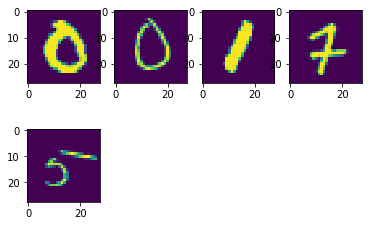

In [4]:
# Let's see how the digits look

j = 1
for i in random.sample(range(0, 70000), 5):
    plt.subplot(2, 4, j)
    plt.imshow(data[i].reshape((28, 28)))
    j += 1

In [5]:
# Class distribution
pd.DataFrame({'count': np.bincount(labels), 'digit': range(10)}, columns=['digit', 'count'])

,digit,count
0,0,6903
1,1,7877
2,2,6990
3,3,7141
4,4,6824
5,5,6313
6,6,6876
7,7,7293
8,8,6825
9,9,6958


In [13]:
# Sampling data
sample_points = np.random.choice(data.shape[0], 2000)

train_data = data[sample_points]
train_labels = labels[sample_points]

In [14]:
print (train_data.shape, train_labels.shape)

((2000, 784), (2000,))


In [15]:
print np.bincount(train_labels)

[191 239 200 226 182 179 189 216 187 191]


## 2. Model 

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [18]:
lr.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## 3. Feature Coefficients

In [19]:
# Shape of the coefficients learned by Logistic Regression

lr.coef_.shape

(10, 784)

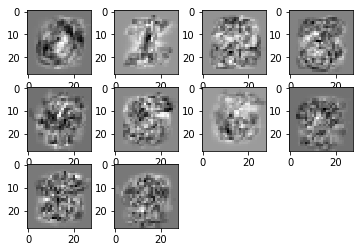

In [20]:
plt.figure()

for ii in xrange(lr.coef_.shape[0]):
    plt.subplot(3, 4, ii+1)
    plt.imshow(lr.coef_[ii,:].reshape(28, 28), cmap=cm.gray_r)

plt.show()

In [25]:
sample_test_points = np.random.choice(data.shape[0], 200)
test_points = set(sample_test_points.tolist()) - set(sample_points.tolist())

test_data = data[sample_test_points]
test_labels = labels[sample_test_points]

In [26]:
len(test_points)

192

In [30]:
test_pred = lr.predict(test_data)

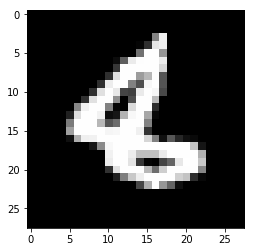

In [31]:
plt.imshow(test_data[3].reshape((28, 28)), cmap=cm.gray)

In [32]:
np.sum(test_labels == test_pred) * 1. / len(test_points)

0.890625